# CC3001 Otoño 2023 Tarea 1 [Marco Martínez 21.003.570-2]

# Pilas de arena abelianas

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian




# Introducción
El objetivo de esta tarea es estudiar un problema inspirado en un fenómeno físico, a través de un modelo matemático, el cual si bien es sencillo, produce resultados que presentan una estructura muy interesante.

<img src="https://ivan-sipiran.com/downloads/arena.png" alt= “” width="200">

La idea es que si uno va formando una pila de arena, llega un momento en que se produce un derrumbe, y la arena de esa pila se derrama hacia los lugares vecinos, estos a su vez se pueden derrumbar, y el proceso continúa hasta que finalmente se estabiliza.

Para estudiar este proceso, usaremos un modelo ultra simplificado. Supondremos que la arena se deposita sobre una superficie plana, la cual está dividida en pequeñas celdas cuadradas, las cuales forman un tablero como se muestra en la siguiente figura:

<img src="https://ivan-sipiran.com/downloads/tablero.png" alt= “” width="100">

El modelo supone que si se apilan demasiados granos de arena en una celda, se produce un derrumbe. En particular, la regla es que si en una celda hay 4 o más granos, se le quitan 4 granos, que se reparten equitativamente hacia las celdas vecinas en los cuatro puntos cardinales.

Para simular este proceso, supondremos que cada celda almacena un número entero, que es la cantidad de granos almacenados en su interior. Aplicando la regla antes descrita (y suponiendo que las celdas que aparecen vacías tienen cero granos), desde la configuración

<img src="https://ivan-sipiran.com/downloads/tablero1.png" alt= “” width="100">

se pasaría a

<img src="https://ivan-sipiran.com/downloads/tablero2.png" alt= “” width="100">

Cuando hay más de una casilla con exceso de granos de arena, la regla se puede aplicar a ellas en cualquier orden y el resultado final es el mismo. Esta propiedad es la que hace que estas pilas de arena se llamen abelianas.

La idea es partir desde una configuración inicial, y luego aplicar esta regla en todos los casilleros que se pueda, hasta que no quede ninguno que tenga 4 o más granos de arena. Esa configuración final la vamos a visualizar asignando un color distinto a cada número de granos.

En particular, nos va a interesar estudiar lo que ocurre cuando la configuración inicial tiene todas las celdas vacías, excepto la del centro, en la cual hay $N$ granos de arena (donde $N$ es un parámetro del problema).

Note que en teoría el tablero es infinito en el sentido que siempre hay espacio para colocar los granos de arena que se van distribuyendo. Para su simulación, usted debe calcular un tamaño del tablero lo suficientemente grande como para estar seguro que ningún grano de arena se salga hacia afuera de los bordes (calcule la máxima área que se puede cubrir con $N$ granos de arena, y después calcule cuan grande debe ser el tablero  para poder contener esa área).

# Tarea

## Parte 1
Usted debe escribir una función en Python llamada ``arena``, tal que dado un valor de $N$, simule el proceso anteriormente descrito hasta que se estabilice. El programa debe contar e imprimir el número total de veces que se aplicó la regla que distribuye granos de arena hacia los vecinos. Además, debe visualizar en la pantalla el tablero resultante, usando los métodos que se describen más adelante.

Por ejemplo, al simular con $N=10000$, la figura que resulta es

<img src="https://ivan-sipiran.com/downloads/tablero3.png" alt= “” width="250">

La idea va a ser ejecutar la función con un valor de $N$ dado por el profesor ($N=128$) y luego con valores crecientes de $N$, hasta el mayor número que pueda alcanzar dentro de un tiempo de ejecución razonable.



Escriba a continuación la definición de su función:

In [ ]:
#importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def arena(N):
  #Calcular la dimension del tablero.
  #tablero tiene que ser siempre impar.
  if N<=8:
    n = 3
  else:
    n = int(np.sqrt(N))
    if n%2==0:
      n = n+1

  #generacion del tablero.
  tablero = np.zeros((n,n))

  #Centro e inicio del tablero.
  centrox = (n//2)
  centroy = (n//2)
  tablero[centrox,centroy] = N

  #funcion que reparte los granos

  def repartir():
    ejecucion = 0
    cambiar = True
    while cambiar==True:
      cambiar = False
      for i in range(0,n):
        for j in range(0,n):
          while tablero[i,j]>=4:
            cambiar = True
            tablero[i,j] -= 4
            tablero[i+1,j] += 1
            tablero[i-1,j] += 1
            tablero[i,j+1] += 1
            tablero[i,j-1] += 1
            ejecucion +=1
    print("Se distribuyeron granos " + str(ejecucion) + " veces.")

  repartir()
  plt.matshow(tablero)
  plt.show()


Explique aquí cómo calculó el tamaño que necesita tener el tablero.

En un comienzo, probando las funciones con un tablero lo suficientemente grande, pero no dependiente de N, noté que la expansión de la arena ocupaba tableros de lado aproximadamente raiz cuadrada de N, por lo tanto, como no se pedía tablero exacto, la aproximación hacía el entero mayor más cercano funcionaba perfectamente.

Por otro lado, hay que notar que el tablero nunca podía tener lados pares, ya que de esta manera no se podía ubicar el centro de manera simétrica, por lo tanto, siempre que la raiz cuadrada del numero fuera par, sumamos una fila y columna al tablero.

Ahora ejecute la función para $N=128$:

Se distribuyeron granos 342 veces.


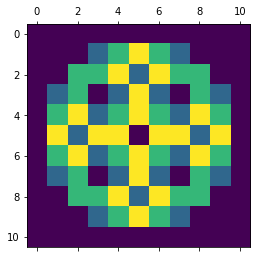

In [ ]:
arena(128)

A continuación ejecute la función para el valor más grande de $N$ que consiga alcanzar en un tiempo razonable:

Se distribuyeron granos 11323826 veces.


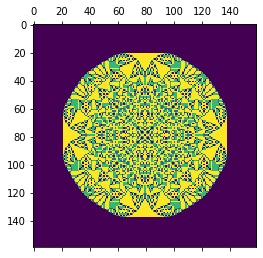

In [ ]:
arena(25000) # reemplace N por el valor máximo que alcanzó a procesar
#"Tiempo razonable:" 1 min aprox.

## Parte 2
Observe que cuando en una celda hay un número grande de granos de arena, es muy ineficiente ir quitándole de 4 en 4, y sería mejor quitar de una sola vez lo más que se pueda. Podemos mejorar nuestro programa si cambiamos la regla de distribución, y decimos que si en una celda hay un número de granos de arena mayor o igual a 4, le quitamos de una sola vez el mayor múltiplo de 4 posible, y todos esos granos lo repartimos equitativamente entre los vecinos de los cuatro puntos cardinales. Escriba una versión modificada de su función de acuerdo a esta nueva regla.



In [ ]:
def arena2(N):
  #Calcular la dimension del tablero.
  #tablero tiene que ser siempre impar.
  if N<=8:
    n = 3
  else:
    n = int(np.sqrt(N))
    if n%2==0:
      n = n+1

  #generacion del tablero.
  tablero = np.zeros((n,n))

  #Centro e inicio del tablero.
  centrox = (n//2)
  centroy = (n//2)
  tablero[centrox,centroy] = N

  #funcion que reparte los granos

  def repartir():
    ejecucion = 0
    cambiar = True
    while cambiar==True:
      cambiar = False
      for i in range(0,n):
        for j in range(0,n):
          while tablero[i,j]>=4:
            cambiar = True
            mult = (tablero[i,j]//4)
            tablero[i,j] -= mult*4
            tablero[i+1,j] += mult
            tablero[i-1,j] += mult
            tablero[i,j+1] += mult
            tablero[i,j-1] += mult
            ejecucion +=1
    print("Se repartieron granos " + str(ejecucion) + " veces.")

  repartir()
  plt.matshow(tablero)
  plt.show()

Ahora ejecute la función para $N=128$:

Se repartieron granos 227 veces.


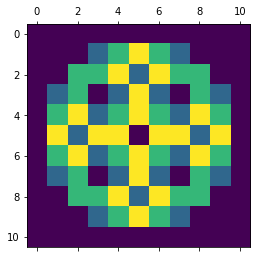

In [ ]:
arena2(128)

A continuación ejecute la función para el valor más grande de  𝑁  que consiga alcanzar en un tiempo razonable. Note que éste número no necesariamente es el mismo que para la función anterior:

Se repartieron granos 18613686 veces.


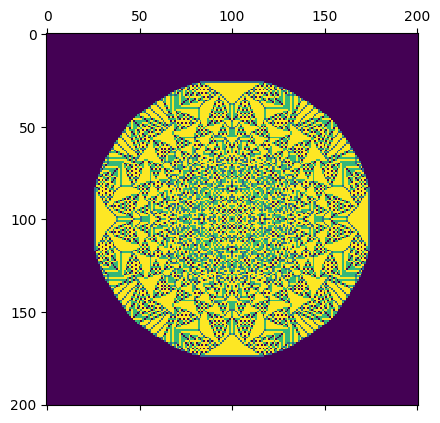

In [ ]:
arena2(40000) # reemplace N por el valor máximo que alcanzó a procesar
#"Tiempo razonable": 1 min 6 seg seg aprox.

## Parte 3
Compare a través de una tabla y un gráfico el número de aplicaciones de la regla que hace el programa en la Parte 1 y el de la Parte 2, para los distintos valores de $N$ que usted haya calculado.

Discuta si valió la pena la optimización y discuta también (pero no implemente) otras posibles optimizaciones que se le ocurran.

*En las siguientes imágenes se muestra la tabla y gráfico comparativo de las funciones.*

Si bien para valores menores a 10.000 granos de arena no se presenta una variacion de ejecuciones tan notoria, al sobrepasar esa marca empezamos a ver diferencias cada vez mayores, llegando a millones.

Por lo tanto, la optimización vale totalmente la pena, esto se ve claramente en el caso de 50.000 granos de arena, donde la diferencia de ejecuciones es de aproximadamente 16 millones.

Cómo metodo de optimización alternativo se me ocurrió generar una base de datos con ciertos tableros de grandes cantidades de arena. Por ejemplo, dejar guardada la matriz para 50.000 granos de arena, y si luego queremos ejecutar una función para generar el tablero para 70.000, la función comience su proceso a partir de la matriz de 50.000 granos. de esta manera ahorraríamos todas las ejecuciones anteriores.



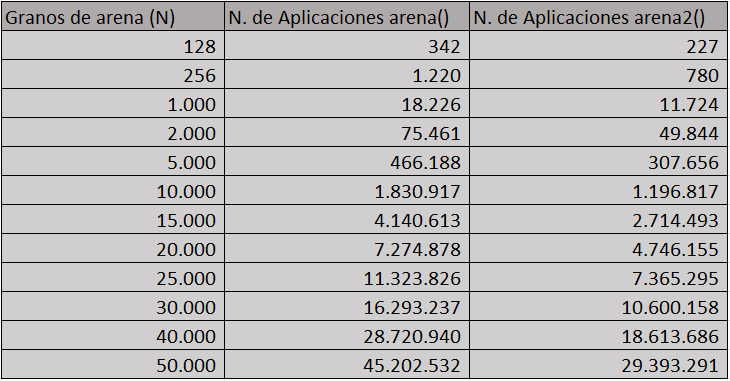

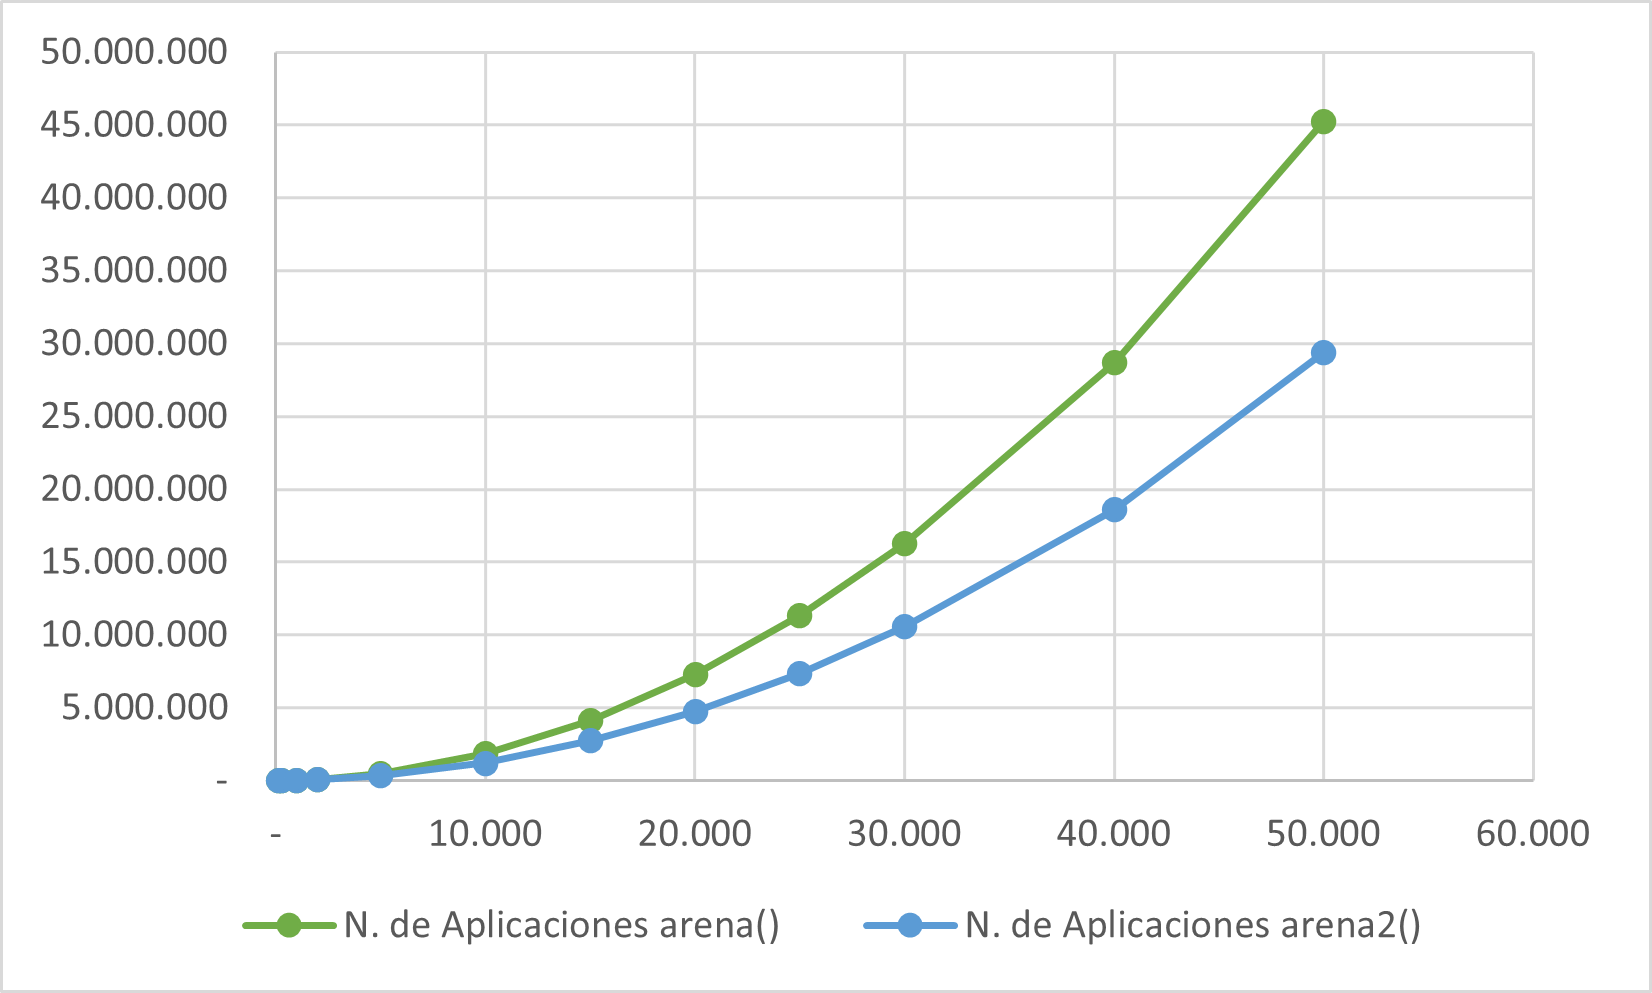

# Visualización

Para la visualización se recomienda usar arreglos de Numpy y la librería Matplotlib. A continuación un código de ejemplo:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Crea una matriz de numpy llena de ceros de dimensión 5x4
mat = np.zeros((5,4))

#Asigna un uno en la posición (0,1)
mat[0][1] = 1

#Dibuja
plt.matshow(mat)
plt.show()

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.